<a href="https://colab.research.google.com/github/btkcodedev/ml-projects/blob/main/Model_%26_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <b>Group 2</b> - Malware detection in images using deep learning <br>


<center> Implementation Phase - CNN Model </center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Drive contains the malware dataset as visualized black and white images

Mounted at /content/drive


Example: \\
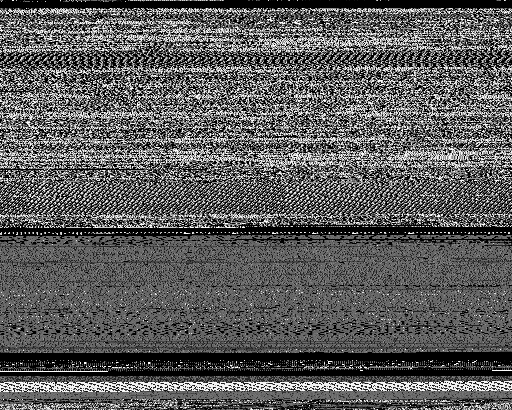

# Import the dependencies



In [ ]:
from sklearn.model_selection import train_test_split        #For dividing dataset into two subsets
from tensorflow import keras                                
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D #Import Several layer type
from keras.models import Model, Sequential                  #Sequential type
from keras.preprocessing.image import ImageDataGenerator    #For generating batches
from keras.models import load_model                         #Load saved model
from matplotlib import pyplot as plt                        #For plotting accuracy and loss
from IPython.display import clear_output                    #For clearing an output of a cell while updating plots
import numpy as np                                          #For argmax, expand dimension functions while prediction
import pandas as pd                                         #For data frame
from sklearn import metrics                                 #For live updation of accuracy and loss during training
import seaborn as sns                                       #For generating heatmap of confusion matrix

# Preprocess & Generate Batches

In [ ]:
n = 25      # 25 classes of malwares

# Generating DataSet
path_root = "/content/drive/MyDrive/malimg_paper_dataset_imgs"
batches = ImageDataGenerator().flow_from_directory(
    directory=path_root, target_size=(64, 64), batch_size=10000                          #Use 10000 as batch size with 64x64 as dimensions
)
imgs, labels = next(batches)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(imgs / 255.0, labels, test_size=0.3) #30% validation data and 70% training data

Found 9367 images belonging to 25 classes.


Process: <br> 

*   Define type -> Add layers -> Fit with dataset -> Predict



In [ ]:
def malware_model():
    Malware_model = Sequential()   #Sequential model type would be appropriate for plain stack of layers with exactly one input & output tensor
    
    Malware_model.add(
        Conv2D(30, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)) 
    )                                                           #30 nodes, 3x3 matrix kernel, ReLu activation, RGB 64x64 input
    Malware_model.add(MaxPool2D(pool_size=(2, 2)))              #Discretization process which downsamples the input dimensions

    Malware_model.add(Conv2D(15, (3, 3), activation="relu"))    #15 nodes, 3x3 matrix kernel, ReLu activation
    Malware_model.add(MaxPool2D(pool_size=(2, 2)))              #Pools the feature map

    Malware_model.add(Dropout(0.25))                            #Prevent model from overfitting
    Malware_model.add(Flatten())                                #Flattens the multi-dimensional input tensors into a single dimension
    Malware_model.add(Dense(128, activation="relu"))            #Deeply connected layer with ReLu
    Malware_model.add(Dropout(0.5))                             #Prevent model from overfitting
    Malware_model.add(Dense(50, activation="relu"))             #Deeply connected layer with ReLu
    Malware_model.add(Dense(n, activation="softmax"))           #Outputs the classification with softmax(Multiclass Classification)

    # Categorical_crossentropy loss function (1 class output is possible), Adam - Adaptive learning rate optimization works by stochastic gradient descent
    Malware_model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return Malware_model

# Callback functions for model

# Plot updation for accuracy, loss

In [ ]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
callbacks_list = [PlotLearning()]

#Confusion matrix heatmap

In [ ]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Train the model

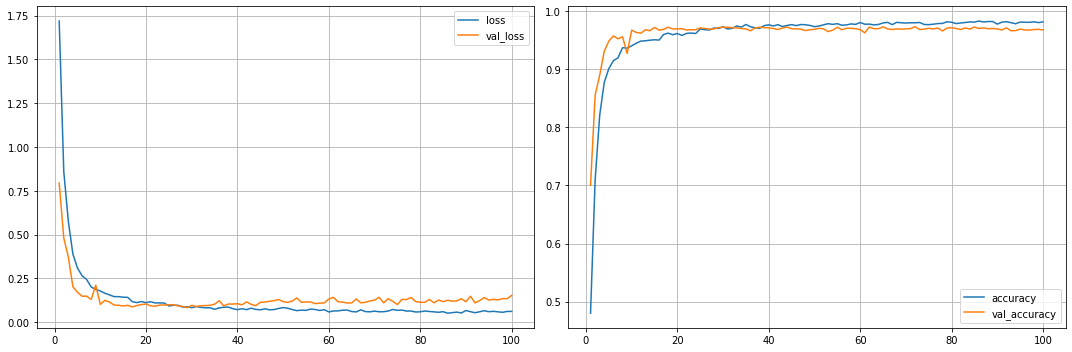

88/88 [==============================] - 3s 39ms/step - loss: 0.1530 - accuracy: 0.9680
INFO:tensorflow:Assets written to: /content/drive/MyDrive/modelcopy/Model/assets


In [ ]:
Malware_model = malware_model()

# Training
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=callbacks_list)

# Evaluating part
scores = Malware_model.evaluate(X_test, y_test)

# save weights and model
Malware_model.save_weights("/content/drive/MyDrive/modelweights")
Malware_model.save("/content/drive/MyDrive/modelcopy/Model")

# load trained model for further use
model = keras.models.load_model("/content/drive/MyDrive/modelcopy/Model")
model.load_weights("/content/drive/MyDrive/modelweights")

In [ ]:
# Accuracy & loss of model
print("Accuracy: "+str(scores[1])+"\n"+"Loss: "+str(scores[0]))

Accuracy: 0.9679829478263855
Loss: 0.1529560536146164


# Confusion Matrix as Heatmap

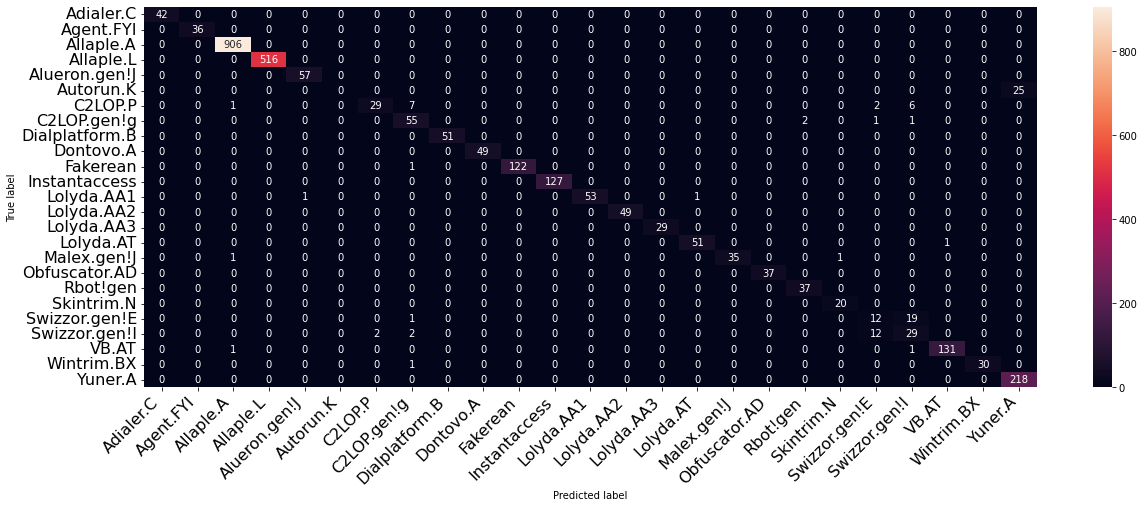

In [ ]:
y_pred = Malware_model.predict(X_test, batch_size=10000)        # Predict using the testing dataset
y_test2 = np.argmax(y_test, axis=1)                             # Returns indices of the max element of the array in a particular axis
y_pred2 = np.argmax(y_pred, axis=1)                             
c_matrix = metrics.confusion_matrix(y_test2, y_pred2)                     # Get the confusion matrix

class_names= batches.class_indices.keys()                                 # Labels for the heatmap
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=16)    # Draw the heatmap

# Prediction of sample images

In [ ]:
from PIL import Image                   #Setting dimensions
from keras.preprocessing import image   #For loading image

# Dimensions of our images
img_width, img_height = 64, 64
# Predicting images
img = image.load_img("/content/drive/MyDrive/modelcopy/test1.png", target_size=(img_width, img_height))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
predicted_class = np.argmax(model.predict(images), axis=1)
print(classes, predicted_class)


key_list = list(batches.class_indices.keys())
val_list = list(batches.class_indices.values())
position = val_list.index(int(predicted_class))
print("\nMalware: "+key_list[position])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]] [0]

Malware: Adialer.C


In [ ]:
img = image.load_img("/content/drive/MyDrive/modelcopy/test2.jpg", target_size=(img_width, img_height))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
predicted_class = np.argmax(model.predict(images), axis=1)
print(classes, predicted_class)

key_list = list(batches.class_indices.keys())
val_list = list(batches.class_indices.values())
position = val_list.index(int(predicted_class))
print("\nMalware: "+key_list[position])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]] [14]

Malware: Lolyda.AA3


# Reporting

In [ ]:
!pip install selenium                   # Install Selenium-python
!apt-get update                         # For updation to run apt install
!apt install chromium-chromedriver      # Chrome driver suitable for chromium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin       #Copy driver to binary folder to access
import sys                               
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver                           # WD is used for accessing website
from selenium.webdriver.common.by import By              # By is used for access specifier
from selenium.webdriver.common.keys import Keys          # For interacting with webpage
from selenium.webdriver.support.ui import WebDriverWait  # Waiting timer for response

     |████████████████████████████████| 968 kB 5.4 MB/s 
     |████████████████████████████████| 138 kB 51.3 MB/s 
     |████████████████████████████████| 359 kB 56.1 MB/s 
     |████████████████████████████████| 3.6 MB 40.8 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 58 kB 4.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
# Make it compatable with colab
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=options)

Avast Website: <center><br>

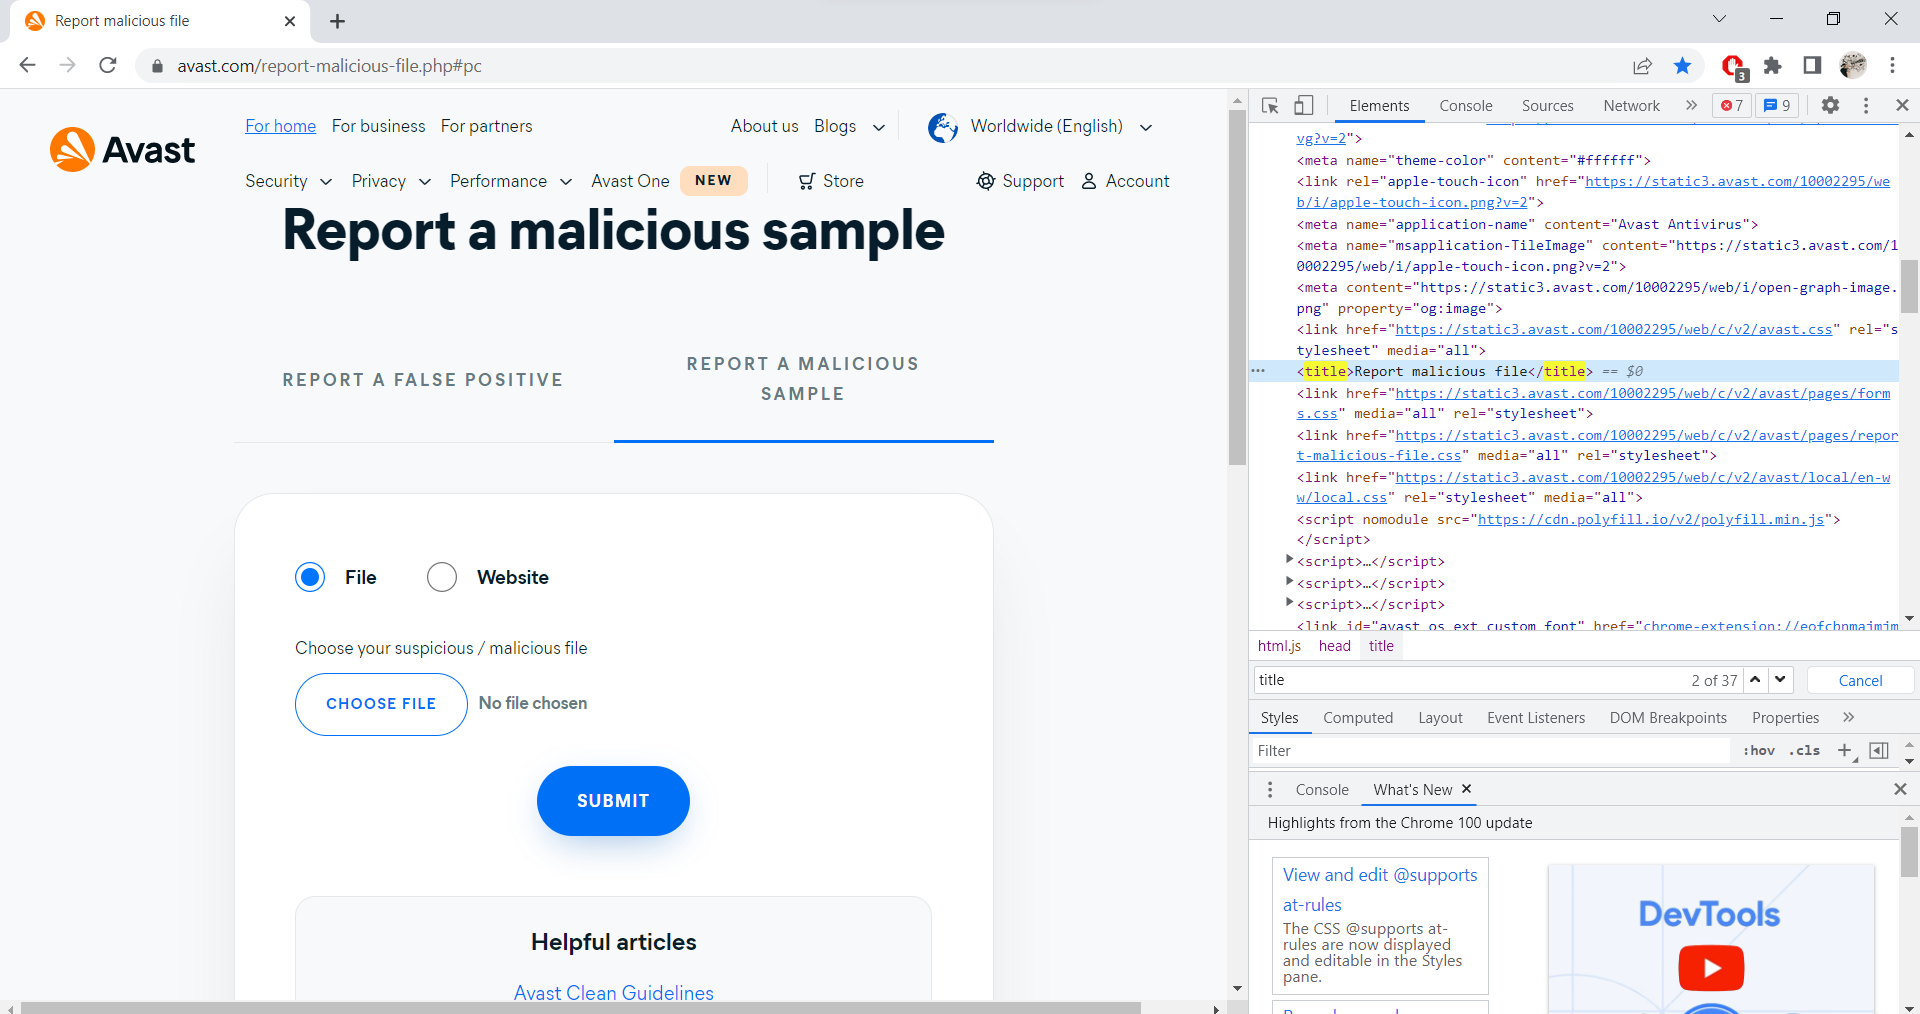
</center>

In [ ]:
wd.get("https://www.avast.com/report-malicious-file.php#pc")  #Provide the website
wd.title                                                      #Get the title for test

'Report malicious file'

Success Page:
<br>
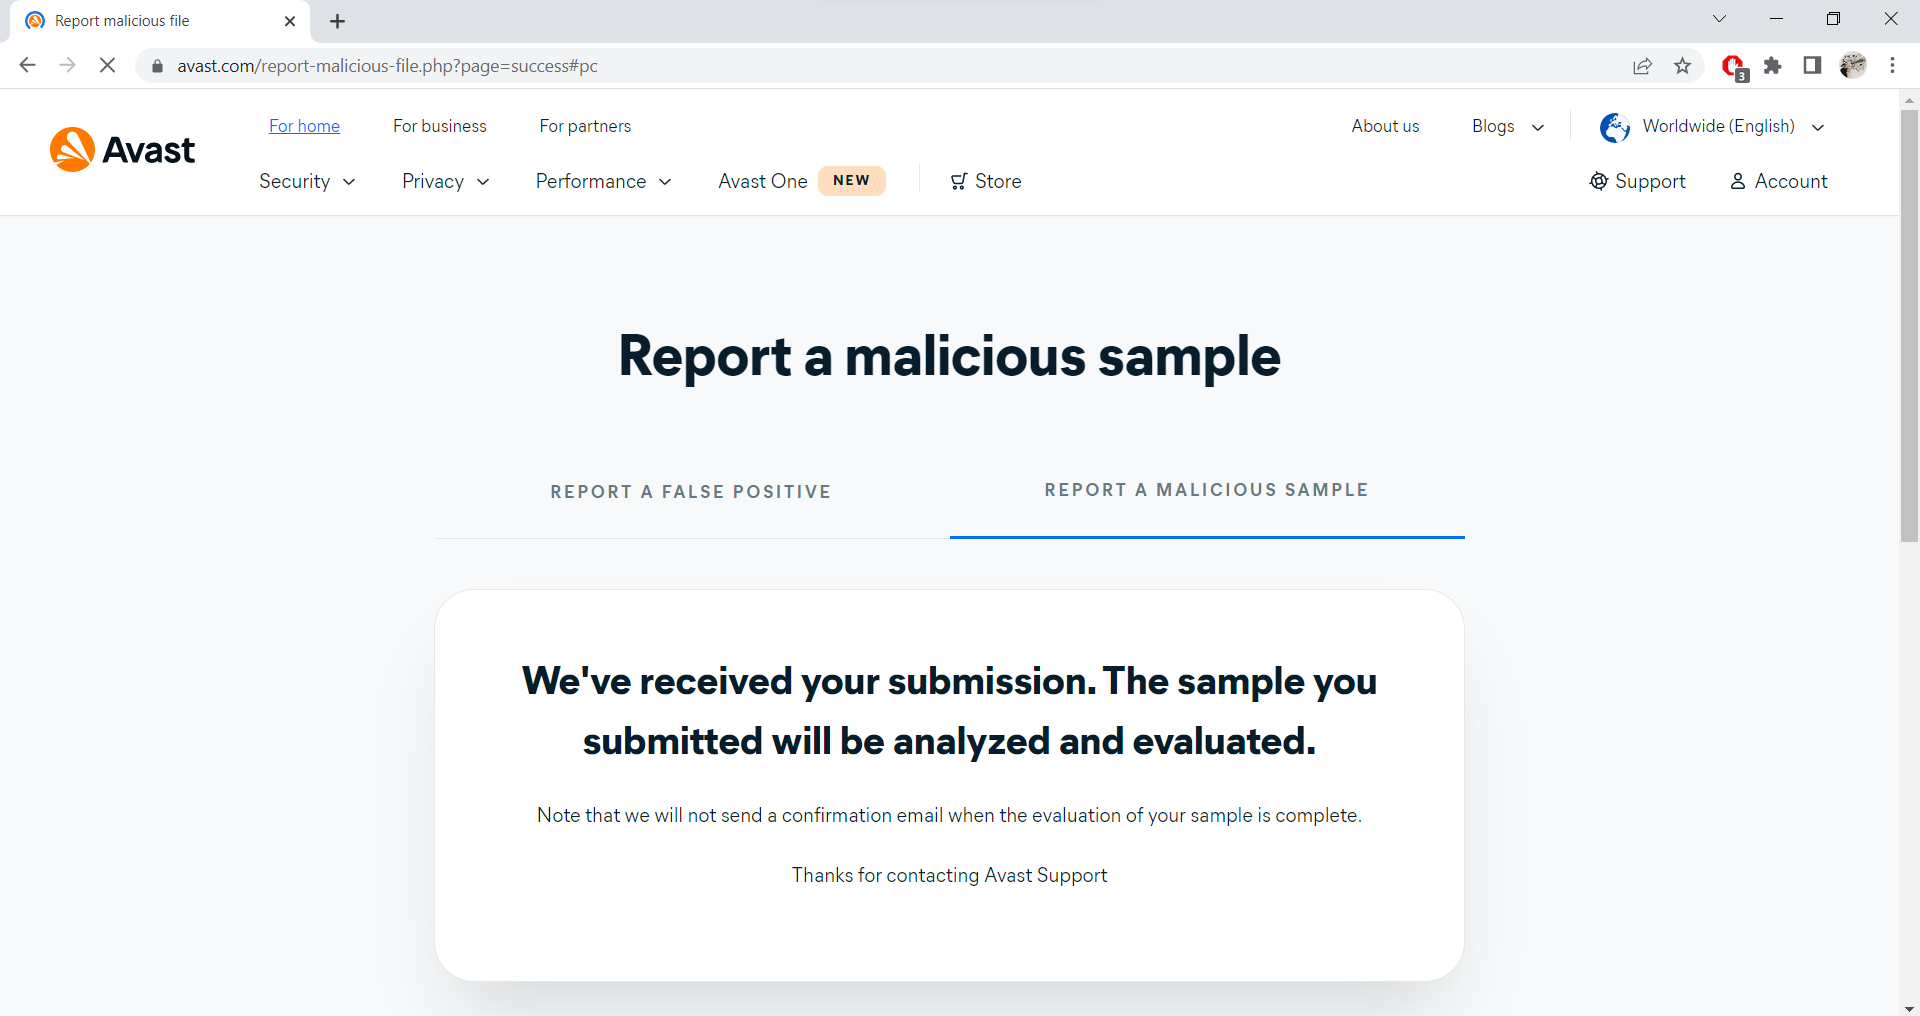

In [ ]:
try:
  wd.find_element(By.ID, value="frm-file").send_keys('/content/sample_data/california_housing_test.csv')      #Add the file in the choose file option
  button = wd.find_element(By.CSS_SELECTOR , value ="input[type='submit']")                 #Find the submit button
  wd.execute_script("arguments[0].click();", button)                                        #Click the submit button
except:
  print("Something Went Wrong")                                                             #Exception
else:
  sub = wd.find_element(By.ID, value = "AVform")                                #Find the acknowledgement in the new redirect page
  print(sub.find_element(By.TAG_NAME, value = "h3").text)                       #Print the ack
  s = sub.find_elements(By.TAG_NAME, value = "p")
  print(s[1].text)

We've received your submission. The sample you submitted will be analyzed and evaluated.
Thanks for contacting Avast Support
